# Solving Systems of Linear Equations: Elimination

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Machine Learning Motivation

Training a linear regression model means solving for weights that minimize error.

In its pure form, you could represent the system as

Aw = b

where

- A: matrix of your training data (features)
- w: vector of model parameters (weights)
- b: output or target values

If you can **solve this system**, you can find the *exact* weights without even doing gradient descent.

That’s what elimination and matrix algebra are all about—finding w

In [3]:
# Linear regression can be written as A * w = b
# Solving for w directly is equivalent to solving a system of linear equations.

print("=== Machine Learning Motivation ===")
print("We want to solve A * w = b for w")

A = np.array([[1, 2], [3, 4]])
b = np.array([5, 11])

# Solve for w (weights)
w = np.linalg.solve(A, b)
print("Weights (solution):", w)
print()

=== Machine Learning Motivation ===
We want to solve A * w = b for w
Weights (solution): [1. 2.]





---



## Singular Systems


=== Singular System ===
System is singular — no unique solution.



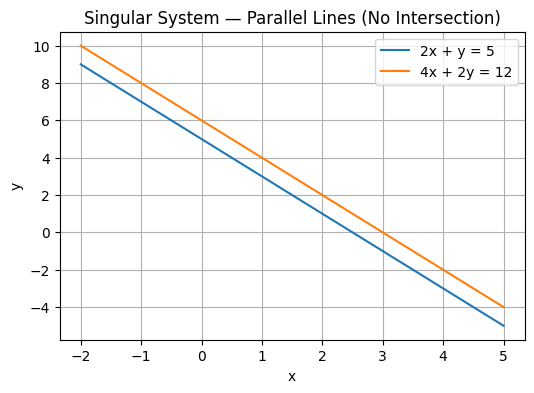

In [7]:
# ------------------------------------------------
# 1. Singular System Example
# ------------------------------------------------
# 2x + y = 5
# 4x + 2y = 12

print("=== Singular System ===")

A1 = np.array([[2, 1],
               [4, 2]])
b1 = np.array([5, 12])

# Try to solve
try:
    sol = np.linalg.solve(A1, b1)
    print("Unique solution:", sol)
except np.linalg.LinAlgError:
    print("System is singular — no unique solution.")
print()

# Let's visualize both lines
x_vals = np.linspace(-2, 5, 100)
y1 = 5 - 2*x_vals
y2 = 12/2 - 2*x_vals

plt.figure(figsize=(6,4))
plt.plot(x_vals, y1, label='2x + y = 5')
plt.plot(x_vals, y2, label='4x + 2y = 12')
plt.legend()
plt.title("Singular System — Parallel Lines (No Intersection)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()



---



=== Singular System ===
System is singular — infinite solutions.



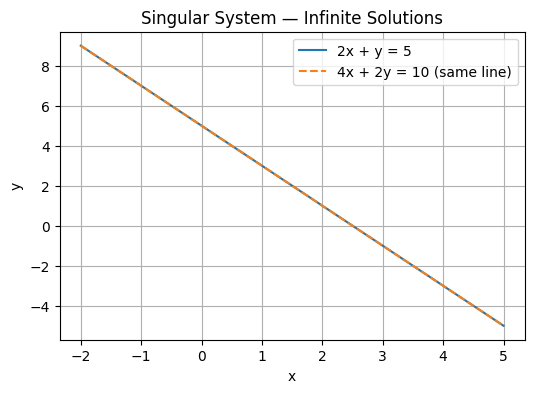

In [9]:
# ------------------------------------------------
# 2. Singular System Example
# ------------------------------------------------
# 2x + y = 5
# 4x + 2y = 10 → same line

print("=== Singular System ===")

A2 = np.array([[2, 1],
               [4, 2]])
b2 = np.array([5, 10])

try:
    sol = np.linalg.solve(A2, b2)
    print("Unique solution:", sol)
except np.linalg.LinAlgError:
    print("System is singular — infinite solutions.")
print()

# Visualize overlapping lines
y1 = 5 - 2*x_vals
y2 = 10/2 - 2*x_vals

plt.figure(figsize=(6,4))
plt.plot(x_vals, y1, label='2x + y = 5')
plt.plot(x_vals, y2, '--', label='4x + 2y = 10 (same line)')
plt.legend()
plt.title("Singular System — Infinite Solutions")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


```
2x + y = 5

4x + 2y = 10
```



**Notice anything?**

If we multiply the first equation by 2, we get the second.

That means both describe the **same line**.

No new information → infinite solutions.

We say the system is **singular**, because the coefficient matrix can’t be inverted.

In ML, this means your training data columns are linearly dependent—your features tell the same story twice.

That’s called **multicollinearity**, and it breaks your model.



---

## 🧮  Gaussian Elimination (Manual Implementation)

### Solving Systems with More Variables

When you have three or more variables, manual substitution becomes a nightmare.

So we translate everything into **matrix form** and use **row reduction**.

Example:

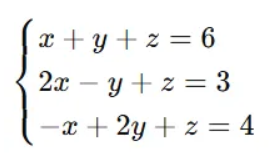

In matrix form:

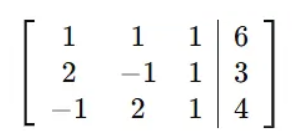

That’s called an **augmented matrix**—left side for coefficients, right for results.

Now, we’ll perform *row operations* to simplify it

## Row Operations That Preserve Singularity

There are only three allowed moves (and they do not change whether the system is singular or not):

| Operation | Meaning | Effect |
| --- | --- | --- |
| Ri↔Rj | Swap two rows | Reorders equations |
| Ri→kRi | Multiply a row by non-zero constant | Rescales an equation |
| Ri→Ri+kRj | Add a multiple of another row | Eliminates variables |

All of them preserve the relationships between equations.

These moves are the legal steps of Gaussian elimination.



---

## Gaussian Elimination — Step by Step

Goal: Turn your matrix into a shape where each variable can be solved easily—called **row echelon form** (next lesson will go deeper).

Simplified Example:

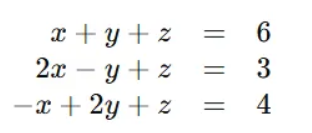

We eliminate x from rows 2 and 3:

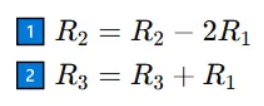

You get a smaller system in y,z.

Then repeat to isolate y, then z.

btw, this mean by pure algebraic reshaping, you find exact values of x,y,z.

No gradient descent needed—just arithmetic precision.



---


### Why It Matters in ML
* The normal equation in linear regression uses

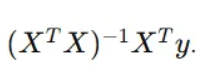

* That inverse exists only if

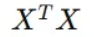

is **non-singular.**

 - Gaussian elimination is how computers find or check that inverse.

So this technique is literally what allows models to *learn exact weights*.

---

In [10]:
# Gaussian Elimination (Manual Implementation)
# ------------------------------------------------
# System:
# x + y + z = 6
# 2y + 5z = -4
# 2x + 5y - z = 27

print("=== Gaussian Elimination Example ===")

A3 = np.array([[1, 1, 1],
               [0, 2, 5],
               [2, 5, -1]], dtype=float)
b3 = np.array([6, -4, 27], dtype=float)

# Augmented matrix
M = np.column_stack((A3, b3))
print("Augmented matrix before elimination:\n", M, "\n")

# Step 1: Eliminate x from rows 2,3
M[2] = M[2] - 2*M[0]
print("After eliminating x from row 3:\n", M, "\n")

# Step 2: Eliminate y from row 3
M[2] = M[2] - (M[2,1]/M[1,1])*M[1]
print("After eliminating y from row 3:\n", M, "\n")

# Note that at this point we got the "Upper Triangular Form"

# Step 3: Back-substitution
z = M[2,3]/M[2,2]
y = (M[1,3] - M[1,2]*z)/M[1,1]
x = (M[0,3] - M[0,1]*y - M[0,2]*z)/M[0,0]

print(f"Solution: x={x:.2f}, y={y:.2f}, z={z:.2f}")
print()

=== Gaussian Elimination Example ===
Augmented matrix before elimination:
 [[ 1.  1.  1.  6.]
 [ 0.  2.  5. -4.]
 [ 2.  5. -1. 27.]] 

After eliminating x from row 3:
 [[ 1.  1.  1.  6.]
 [ 0.  2.  5. -4.]
 [ 0.  3. -3. 15.]] 

After eliminating y from row 3:
 [[  1.    1.    1.    6. ]
 [  0.    2.    5.   -4. ]
 [  0.    0.  -10.5  21. ]] 

Solution: x=5.00, y=3.00, z=-2.00



### Result
- The code manually re-executed the Gaussian elimination algorithm in clear steps.

- Each row operation maintained the equivalence of the equations, meaning it did not change the system's solutions.

- The final result confirms that the system is non-singular because we obtained a unique solution.



---
### Connection to Machine Learning
In linear regression, the goal is to find the weights that satisfy the relationship:

Capture.PNG

To find the weights without using Gradient Descent, we can solve the mathematical equation:

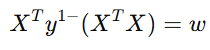


But this is only possible if the matrix
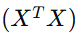

is non-singular (invertible).

In [11]:
# 🤖 Connection to Machine Learning
# ------------------------------------------------
print("=== Connection to Machine Learning ===")

# generates random data representing features in 5 samples (rows) and 2 properties (columns).
X = np.random.randn(5, 2)
y = np.random.randn(5, 1)

# It calculates the matrix XTX, a 2x2 square matrix.
XtX = X.T @ X
print("Matrix X^T X:\n", XtX)

# calculates its determinant.
print("Determinant =", np.linalg.det(XtX))

# If the determinant is ≠ 0, the matrix is ​​invertible.
# If the determinant is = 0, the matrix is ​​singular.
if np.linalg.det(XtX) != 0:
    w = np.linalg.inv(XtX) @ X.T @ y
    print("Regression weights:\n", w)
else:
    print("Matrix is singular — cannot invert!")


=== Connection to Machine Learning ===
Matrix X^T X:
 [[ 2.0250327  -0.38048934]
 [-0.38048934  4.81756659]]
Determinant = 9.610957731432679
Regression weights:
 [[0.03651308]
 [0.25611866]]


Because the determinant is positive (≈9.61), it is not singular, so it can be calculated as follows:

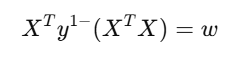


This is what the code did:

```
w = np.linalg.inv(XtX) @ X.T @ y
```

And it gave approximate weights such as:

Regression weights:
 [[0.0365]
 [0.2561]]


### === Summary ===
- The matrix $$X^T X$$ represents the same concept we used when solving a system of linear equations.

- In Machine Learning, if $$X^T X$$ is **singular**, the model cannot be trained using this method, because the equation cannot be solved exactly.

- Gaussian elimination → step-by-step elimination of variables

- Therefore, **Gaussian Elimination** forms the foundation that computers use to solve such systems within machine learning algorithms.

